In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
!pip install matplotlib

In [4]:
!pip install wordcloud

In [5]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [6]:
all_files = glob.glob('8장_data/myCabineExcelData*.xls')
all_files

[]

In [7]:
all_files = glob.glob('8장_data/myCabinetExcelData*.xls')
all_files

['8장_data\\myCabinetExcelData (1).xls',
 '8장_data\\myCabinetExcelData (2).xls',
 '8장_data\\myCabinetExcelData (3).xls',
 '8장_data\\myCabinetExcelData (4).xls',
 '8장_data\\myCabinetExcelData (5).xls',
 '8장_data\\myCabinetExcelData (6).xls',
 '8장_data\\myCabinetExcelData (7).xls',
 '8장_data\\myCabinetExcelData (8).xls',
 '8장_data\\myCabinetExcelData (9).xls',
 '8장_data\\myCabinetExcelData.xls']

In [8]:
all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.

In [9]:
!pip install xlrd

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 1.8 MB/s eta 0:00:00


In [10]:
all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,An Ensemble-Based Scalable Approach for Intrus...,"Sahu, Santosh Kumar; Mohapatra, Durga Prasad; ...",Mary Ann Leibert,2021
1,NaN,2,Call for Special Issue Papers: Big Data Analyt...,"El-Latif, Ahmed A. Abd; Tawalbeh, Lo'ai; Maleh...",Mary Ann Leibert,2021
2,NaN,3,Big data drives the development of Earth science,"Guo, Huadong",John Wiley & Sons Ltd,2017
3,NaN,4,Call for Special Issue Papers: Big Data Analyt...,"Balamurugan, S.; Muthu, Bala Anand; Peng, Shen...",Mary Ann Leibert,2020
4,NaN,5,Call for Special Issue Papers: Big Data in Bus...,"Nobanee, Haitham",Mary Ann Leibert,2020
...,...,...,...,...,...,...
95,NaN,96,Hybridisation of classifiers for anomaly detec...,"Alguliyev, Rasim M.; Aliguliyev, Ramiz M.; Abd...",Inderscience,2019
96,NaN,97,Smart Monitoring Cameras Driven Intelligent Pr...,"Shao, Z.; Cai, J.; Wang, Z.",unknown,2018
97,NaN,98,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
98,NaN,99,Towards Max-Min Fair Resource Allocation for S...,"Jiang, Y.; Huang, Z.; Tsang, D. H.",unknown,2018


In [11]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_
                                  index = True
all_files_data_concat

SyntaxError: '(' was never closed (992860032.py, line 1)

In [12]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_
                                  index = True)
all_files_data_concat

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2129724081.py, line 1)

In [13]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_
                                  index = True)
all_files_data_concat

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2129724081.py, line 1)

In [14]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,An Ensemble-Based Scalable Approach for Intrus...,"Sahu, Santosh Kumar; Mohapatra, Durga Prasad; ...",Mary Ann Leibert,2021
1,NaN,2,Call for Special Issue Papers: Big Data Analyt...,"El-Latif, Ahmed A. Abd; Tawalbeh, Lo'ai; Maleh...",Mary Ann Leibert,2021
2,NaN,3,Big data drives the development of Earth science,"Guo, Huadong",John Wiley & Sons Ltd,2017
3,NaN,4,Call for Special Issue Papers: Big Data Analyt...,"Balamurugan, S.; Muthu, Bala Anand; Peng, Shen...",Mary Ann Leibert,2020
4,NaN,5,Call for Special Issue Papers: Big Data in Bus...,"Nobanee, Haitham",Mary Ann Leibert,2020
...,...,...,...,...,...,...
995,NaN,96,Unsupervised Tensor Mining for Big Data Practi...,unknown,Mary Ann Leibert,2016
996,NaN,97,Atmospheric and ecosystem big data providing k...,"Kulmala, Markku; Lintunen, Anna; Ylivinkka, Il...",John Wiley & Sons Ltd,2021
997,NaN,98,A comparison on scalability for batch big data...,"García-Gil, Diego; Ramírez-Gallego, Sergio; Ga...",Springer Nature,2017
998,NaN,99,Labor Economists Get Their Microscope: Big Dat...,unknown,Mary Ann Leibert,2015


In [15]:
all_files_data_concat.to_csv('8장_data/riss_bigdata.csv', encoding = 'utf-8', index = false)

NameError: name 'false' is not defined

In [16]:
all_files_data_concat.to_csv('8장_data/riss_bigdata.csv', encoding = 'utf-8', index = False)

In [17]:
all_title = all_files_data_concat['제목']
all_title

0      An Ensemble-Based Scalable Approach for Intrus...
1      Call for Special Issue Papers: Big Data Analyt...
2       Big data drives the development of Earth science
3      Call for Special Issue Papers: Big Data Analyt...
4      Call for Special Issue Papers: Big Data in Bus...
                             ...                        
995    Unsupervised Tensor Mining for Big Data Practi...
996    Atmospheric and ecosystem big data providing k...
997    A comparison on scalability for batch big data...
998    Labor Economists Get Their Microscope: Big Dat...
999    Call for Special Issue Papers: Deep Learning A...
Name: 제목, Length: 1000, dtype: object

In [18]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [19]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken in w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

NameError: name 'w' is not defined

In [20]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken in w not if stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

SyntaxError: invalid syntax (189413748.py, line 6)

In [21]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [22]:
print(words)

[['ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'intelligent', 'system', 'cybersecurity'], ['big', 'data', 'drive', 'development', 'earth', 'science'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'agricultural', 'disaster', 'management'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'business'], ['medical', 'school', 'training', 'relate', 'practice', 'evidence', 'big', 'data'], ['big', 'data', 'support', 'sustainable', 'development', 'goal', 'celebration', 'establishment', 'international', 'research', 'center', 'big', 'data', 'sustainable', 'development', 'goal', 'cbas'], ['towards', 'quantifying', 'psychiatric', 'diagnosis', 'using', 'machine', 'learning', 'algorithm', 'big', 'fmri', 'data'], ['us', 'big', 'data', 'city'], ['call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data', 'cognitive', 'iot'], ['call', 's

In [23]:
words2 = list(reduce(lambda x,y:x+y, words))
print(words2)

['ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework', 'call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'intelligent', 'system', 'cybersecurity', 'big', 'data', 'drive', 'development', 'earth', 'science', 'call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'agricultural', 'disaster', 'management', 'call', 'special', 'issue', 'paper', 'big', 'data', 'business', 'medical', 'school', 'training', 'relate', 'practice', 'evidence', 'big', 'data', 'big', 'data', 'support', 'sustainable', 'development', 'goal', 'celebration', 'establishment', 'international', 'research', 'center', 'big', 'data', 'sustainable', 'development', 'goal', 'cbas', 'towards', 'quantifying', 'psychiatric', 'diagnosis', 'using', 'machine', 'learning', 'algorithm', 'big', 'fmri', 'data', 'us', 'big', 'data', 'city', 'call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data', 'cognitive', 'iot', 'call', 'special', 'issue', 'pa

In [24]:
count = Counter(words2)

In [26]:
count

Counter({'data': 1225,
         'big': 1107,
         'analytics': 133,
         'based': 108,
         'analysis': 99,
         'system': 66,
         'driven': 65,
         'using': 64,
         'issue': 64,
         'approach': 59,
         'special': 55,
         'learning': 51,
         'model': 51,
         'call': 49,
         'paper': 48,
         'challenge': 42,
         'management': 41,
         'application': 40,
         'framework': 39,
         'algorithm': 39,
         'platform': 37,
         'cloud': 36,
         'science': 35,
         'new': 33,
         'computing': 31,
         'health': 31,
         'network': 31,
         'era': 31,
         'research': 30,
         'processing': 29,
         'opportunity': 27,
         'perspective': 27,
         'distributed': 27,
         'performance': 27,
         'machine': 26,
         'service': 26,
         'earth': 25,
         'mining': 25,
         'development': 24,
         'business': 24,
         'review': 24,
 

In [28]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag , counts))

data : 1225
big : 1107
analytics : 133
based : 108
analysis : 99
system : 66
driven : 65
using : 64
issue : 64
approach : 59
special : 55
learning : 51
model : 51
call : 49
paper : 48
challenge : 42
management : 41
application : 40
framework : 39
algorithm : 39
platform : 37
cloud : 36
science : 35
new : 33
computing : 31
health : 31
network : 31
era : 31
research : 30
processing : 29
opportunity : 27
perspective : 27
distributed : 27
performance : 27
machine : 26
service : 26
earth : 25
mining : 25
development : 24
business : 24
review : 24
technology : 24
intelligence : 23
editorial : 23
information : 22
smart : 22
use : 22
world : 22
sustainable : 21
energy : 21


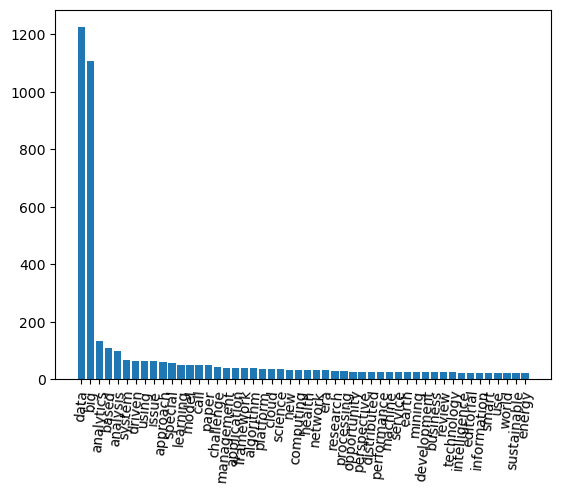

In [31]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 85)
plt.show()

In [32]:
del word_count['big']

In [33]:
del word_count['data']

In [38]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count()

In [39]:
summary_year

,출판일,doc_count
0,2003,1
1,2004,1
2,2011,4
3,2012,15
4,2013,37
5,2014,125
6,2015,87
7,2016,111
8,2017,124
9,2018,113


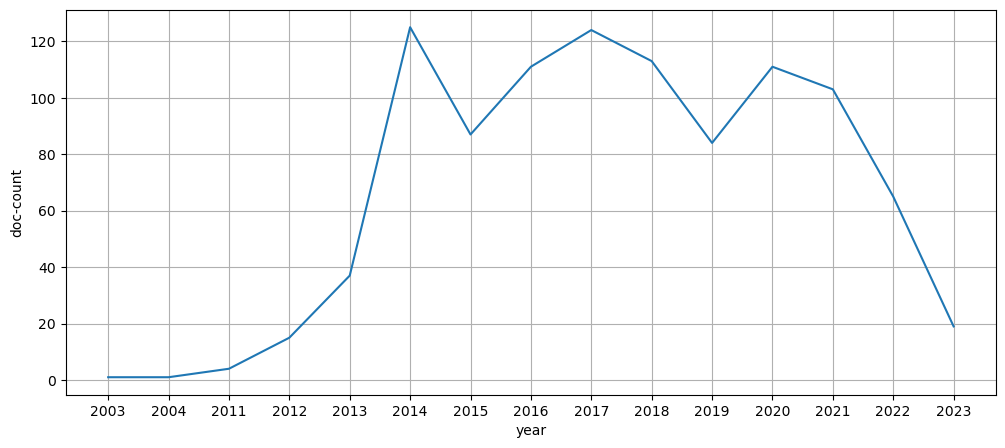

In [40]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

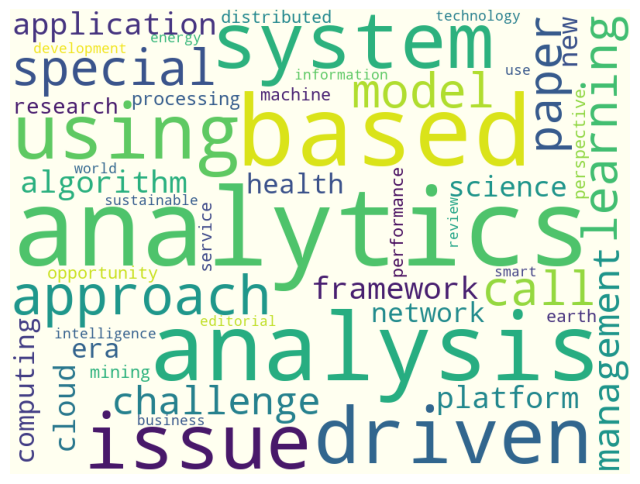

In [41]:
stopwords = set(STOPWORDS)
wc =WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [42]:
cloud.to_file("8장_data/riss_bigdata_wordCloud.jpg")